# Quadrotor Direct Transcription
by Sebastian Lopez-Cot

This python notebook can be used to run the quad-ball system. The quadrotor will try to send a ball to a desired location given initial conditions and will attempt to return to its original starting point.

Should end at:  [ 0.  0.]
Number of decision vars:  320
Solve:  SolutionResult.kSolutionFound


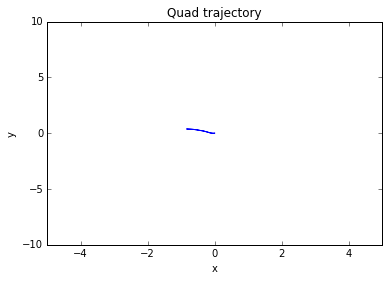

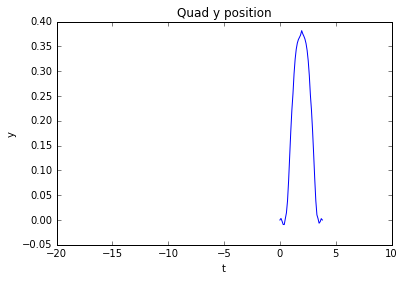

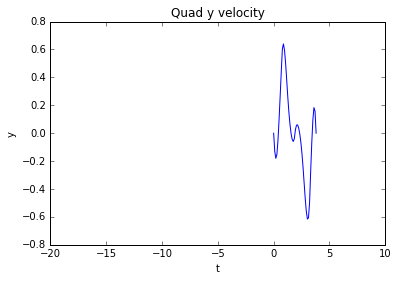

[[ 0.          0.          0.        ]
 [-0.01        0.00319935  0.01063588]
 [-0.02144059 -0.00239676  0.02317176]
 [-0.03542539 -0.00905461  0.03698554]
 [-0.05338671 -0.00921565  0.04964751]
 [-0.07687592  0.00293359  0.06081688]
 [-0.10730806  0.0145918   0.07027966]
 [-0.14586642  0.03869719  0.07793398]
 [-0.19347141  0.07913142  0.06377319]
 [-0.24934728  0.12932746  0.04786677]
 [-0.31136649  0.17902982  0.03033952]
 [-0.37772826  0.22185658  0.01135324]
 [-0.44678599  0.25425235 -0.00890753]
 [-0.51691942  0.29488639 -0.03024704]
 [-0.58448037  0.3242977  -0.05051728]
 [-0.64770643  0.3441893  -0.06952951]
 [-0.70483972  0.35665534 -0.08711119]
 [-0.75414579  0.3638937  -0.10311338]
 [-0.79391625  0.36834464 -0.11741731]
 [-0.82244226  0.37303251 -0.12993981]
 [-0.83797918  0.38184652 -0.12169021]
 [-0.82024582  0.37541392 -0.11056336]
 [-0.79055347  0.37066305 -0.09765353]
 [-0.75032923  0.36489705 -0.08304187]
 [-0.70103682  0.35597845 -0.06684481]
 [-0.64419913  0.34205747

In [6]:
%reload_ext autoreload
%autoreload 2

import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import scipy as sp

from pydrake.all import MathematicalProgram
from pydrake.symbolic import (sin,cos,tanh)

from quad_direct_transcription import (QuadDirectTranscription)
from IPython.display import HTML

# Define the min and max time for the problem
time_used = 4.0

# Quad initial conditions
initial_quad_state = np.zeros(6)
initial_quad_state[0] = 0.0
initial_quad_state[1] = 0.0
initial_quad_state[2] = 0.0
initial_quad_state[3] = 0.0
initial_quad_state[4] = 0.0
initial_quad_state[5] = 0.0

final_quad_state = np.zeros(6)
final_quad_state[0] = 0.0 #np.random.choice(np.arange(-4.0, 4.0, 0.1))
final_quad_state[1] = 0.0 #np.random.choice(np.arange(1.0, 5.0, 0.1))
final_quad_state[2] = 0.0 #np.random.choice(np.arange(-np.pi/6.0, np.pi/6.0, 0.1))
final_quad_state[3] = 0.0
final_quad_state[4] = 0.0
final_quad_state[5] = 0.0

print "Should end at: ", final_quad_state[0:2]

# System params
quad_mass = 0.1
ball_mass = 0.01
g = -9.81
beta = 1.0

# Run the solver
qdt = QuadDirectTranscription(quad_mass, g)
quad_traj, input_traj, time_array = qdt.solve(initial_quad_state, final_quad_state, time_used)

# Visualize the results
plt.figure()
plt.title("Quad trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5,5)
plt.ylim(-10,10)
plt.plot(quad_traj[:,0], quad_traj[:,1])
plt.show()

plt.figure()
plt.title("Quad y position")
plt.xlim(-20,10)
plt.xlabel("t")
plt.ylabel("y")
plt.plot(time_array[0:40], quad_traj[:,1])
plt.show()

plt.figure()
plt.title("Quad y velocity")
plt.xlim(-20,10)
plt.xlabel("t")
plt.ylabel("y")
plt.plot(time_array[0:40], quad_traj[:,4])
plt.show()

#print input_traj
print quad_traj[:,0:3]
